<h1> <b> Lab - 6 </b> </h1>
<h3>Exercise - 1</h3>
<br>

# Exercise: 1. Train the Naive Bayes model without PCA and compare the result with PCA + Naive Bayes. Write down your observations.

In [1]:
%matplotlib inline

In [2]:
from sklearn import datasets
faces = datasets.fetch_olivetti_faces()
faces.data.shape

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


(400, 4096)

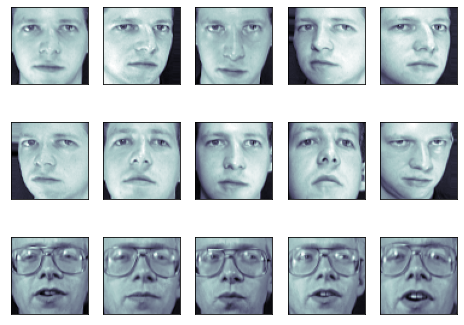

In [3]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(8, 6))
# plot several images
for i in range(15):
  ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
  ax.imshow(faces.images[i], cmap=plt.cm.bone)

# Applying Naive Bayes + PCA

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, random_state = 46)
print(X_train.shape, X_test.shape)

(300, 4096) (100, 4096)


In [5]:
from sklearn import decomposition
pca = decomposition.PCA(n_components = 150, whiten = True)
pca.fit(X_train)

PCA(n_components=150, whiten=True)

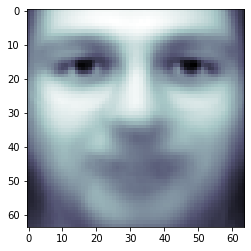

In [6]:
plt.imshow(pca.mean_.reshape(faces.images[0].shape), cmap = plt.cm.bone)

In [7]:
print(pca.components_.shape)

(150, 4096)


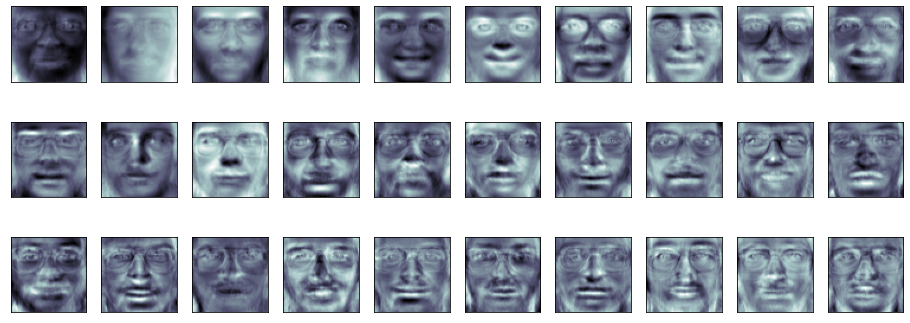

In [8]:
fig = plt.figure(figsize = (16, 6))
for i in range(30):
  ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
  ax.imshow(pca.components_[i].reshape(faces.images[0].shape), cmap = plt.cm.bone)

In [9]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape)

(300, 150)


In [10]:
print(X_test_pca.shape)

(100, 150)


In [ ]:
# Applying NB

In [11]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_pca, y_train)

GaussianNB()

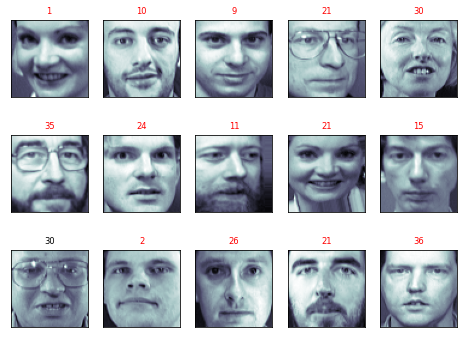

In [12]:
import numpy as np
fig = plt.figure(figsize=(8, 6))

for i in range(15):
  ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
  ax.imshow(X_test[i].reshape(faces.images[0].shape), cmap = plt.cm.bone)

  y_pred = gnb.predict(X_train_pca[i, np.newaxis])[0]
  color = ('black' if y_pred == y_test[i] else 'red')
  ax.set_title(y_pred, fontsize = 'small', color = color)

In [14]:
from sklearn import metrics
y_pred = gnb.predict(X_test_pca)
print("Accuracy: \n", metrics.accuracy_score(y_test, y_pred))

Accuracy: 
 0.81


# Applying only Naive Bayes Classifier

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, random_state = 46)
print(X_train.shape, X_test.shape)

(300, 4096) (100, 4096)


In [16]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

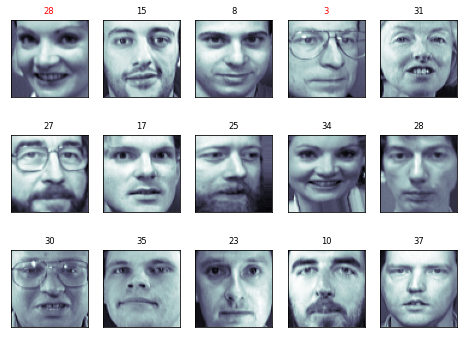

In [17]:
import numpy as np
fig = plt.figure(figsize=(8, 6))

for i in range(15):
  ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
  ax.imshow(X_test[i].reshape(faces.images[0].shape), cmap = plt.cm.bone)

  y_pred = gnb.predict(X_test[i, np.newaxis])[0]
  color = ('black' if y_pred == y_test[i] else 'red')
  ax.set_title(y_pred, fontsize='small', color=color)

In [18]:
from sklearn import metrics
y_pred = gnb.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75         3
           1       1.00      0.60      0.75         5
           2       0.00      0.00      0.00         0
           3       0.80      1.00      0.89         4
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         2
           9       0.00      0.00      0.00         0
          10       1.00      0.80      0.89         5
          11       1.00      0.50      0.67         4
          12       0.33      0.50      0.40         2
          13       1.00      0.67      0.80         3
          14       1.00      1.00      1.00         4
          15       0.50      1.00      0.67         2
          17       1.00      1.00      1.00         3
          18       1.00      1.00      1.00         2
          19       0.50    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
print("Accuracy: \n",metrics.accuracy_score(y_test, y_pred))

Accuracy: 
 0.84


# Observations

1.   Accuracy of Naive Bayes with PCA = 81%
2.   Accuracy of Naive Bayes without PCA = 84%

<h1>
<b>
We concluded that by using the PCA, we are reducing the dimension of the features and applying the Naive Bayes classifier on both without dimensionality reduction and with dimensionality reduction, we can observe not much difference in accuracies of the model in both cases.
Hence, We can say that PCA is very useful dimensionality reduction technique that we can use to train the model efficiently.
</b>
</h1>

